***Tutorial5***

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


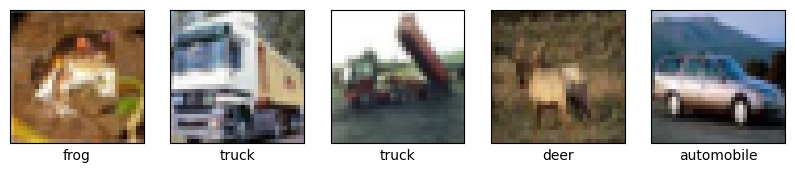

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3647 - loss: 1.7281 - val_accuracy: 0.5642 - val_loss: 1.2310
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5677 - loss: 1.2027 - val_accuracy: 0.6192 - val_loss: 1.0785
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6385 - loss: 1.0207 - val_accuracy: 0.6412 - val_loss: 1.0080
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6855 - loss: 0.8973 - val_accuracy: 0.6686 - val_loss: 0.9606
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7081 - loss: 0.8257 - val_accuracy: 0.6745 - val_loss: 0.9448
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7362 - loss: 0.7562 - val_accuracy: 0.7043 - val_loss: 0.8580
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7535 - loss: 0.7003 - val_accuracy: 0.7048 - val_loss: 0.8680
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7693 -

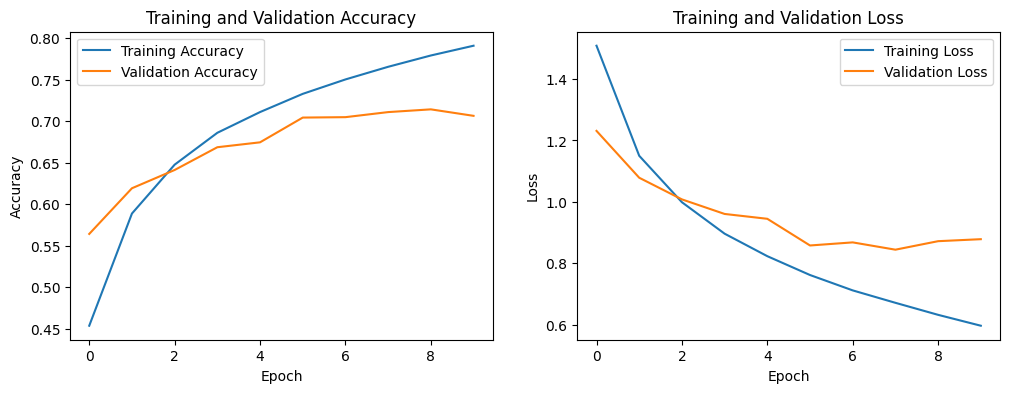

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


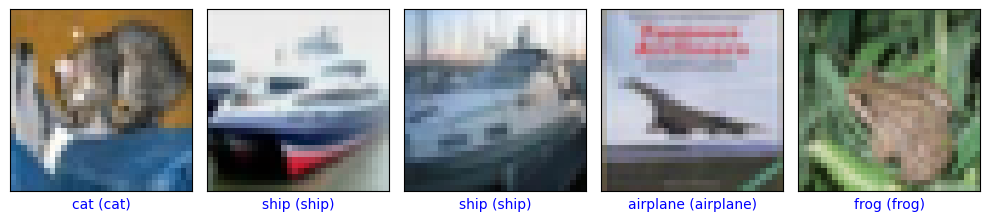

In [ ]:
'''Step 1 Importing Necessary Libraries'''
import tensorflow as tf  # For building and training the CNN
from tensorflow.keras import layers, models  # For creating layers and models
import matplotlib.pyplot as plt  # for plotting images and accuracy graphs
import numpy as np  # For numerical operations

'''Step 2 Load and Preprocess the CIFAR-10 Dataset'''
# Load the CIFAR-10 dataset from TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values from range [0, 255] to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'''Step 3 Visualize Some Data'''
# Plot the first 5 images from the training set along with their labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False) # Disables Grid
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])  # Show the label with class name
plt.show()

'''Step4 Build the CNN model'''
model = models.Sequential([
    # 1st Convolutional layer with 32 filter, a 3x3 kernal & ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max Pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    #2nd Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),

    #3rd Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output to feed into FC layers
    layers.Flatten(),
    # FC layer with 64 neurons & ReLU activation
    layers.Dense(64, activation='relu'),
    # Output layer with 10 neurons(one for each class) & softmax activation
    layers.Dense(10, activation='softmax')
])

'''Step 5 Compile the Model'''
# Compile the model using Adam optimizer and sparse categorical crossentropy as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture summary
model.summary()

'''Step 6 Train the Model'''
# Train the model for 10 epochs and validate on the test data
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

'''Step 7 Evaluate the Model'''
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

'''Step 8 Plot Training and Validation Accuracy/Loss'''
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12,4))

# Plot training and validation accuracy
plt.subplot(1,2,1)  # 1 row, 2 columns, this is the first plot
plt.plot(history.history['accuracy'], label='Training Accuracy') # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plot validaton accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Add legend to differentiate the two lines

# Plot training and validation loss
plt.subplot(1,2,2)  # 1 row, 2 columns, this is the second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Add legend to differentiate the two lines

plt.show()

'''Step 9 Make Predictions on Test Data'''
# Make predictions on the first 5 test images
predictions = model.predict(test_images[:5])

'''Step 10 Visualize Predictions'''
# Define a function to display images and predictions
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)  # Disable grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.imshow(img) # display the image

    #Get the predicted label
    predicted_label = np.argmax(predictions_array)
    # Set the color of the text based on whether the pred is correct
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # show the pred and true label in the image
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

# Visualize the first 5 test images with predictions
plt.figure(figsize=(10,10))  # Create a figure for displaying 5 images in rows

for i in range(5): # loop through the first 5 images
    plt.subplot(1,5,i+1)  # 5 rows, 1 column, 1 image per row
    plot_image(i, predictions[i], test_labels, test_images, class_names)  # Call the plotting function
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Show the plot

***TASK Using Different architectures***

**Trial1) When I changed the filter size from 3x3 kernal to 5x5 kernal the accuracy dropped & overfiiting increased**


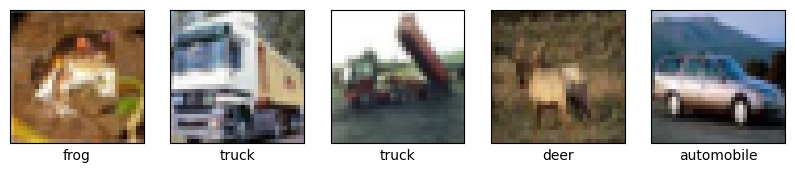

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 10, 10, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 1, 1, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,978 (2.38 MB)

 Trainable params: 623,978 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3573 - loss: 1.7422 - val_accuracy: 0.5435 - val_loss: 1.2799
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5896 - loss: 1.1631 - val_accuracy: 0.6182 - val_loss: 1.1170
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6579 - loss: 0.9859 - val_accuracy: 0.6436 - val_loss: 1.0236
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6997 - loss: 0.8590 - val_accuracy: 0.6699 - val_loss: 0.9338
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7368 - loss: 0.7588 - val_accuracy: 0.6897 - val_loss: 0.9042
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7619 - loss: 0.6763 - val_accuracy: 0.6937 - val_loss: 0.9081
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7890 - loss: 0.6021 - val_accuracy: 0.6947 - val_loss: 0.9386
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8087 - loss: 0.5395 

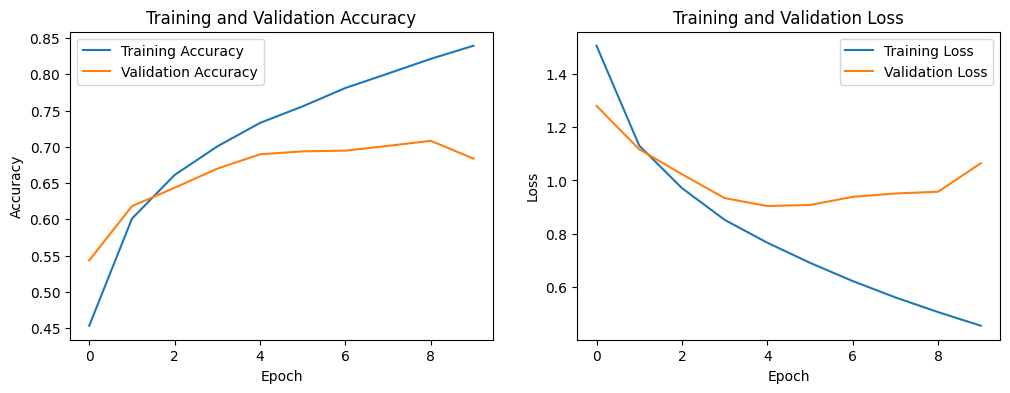

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


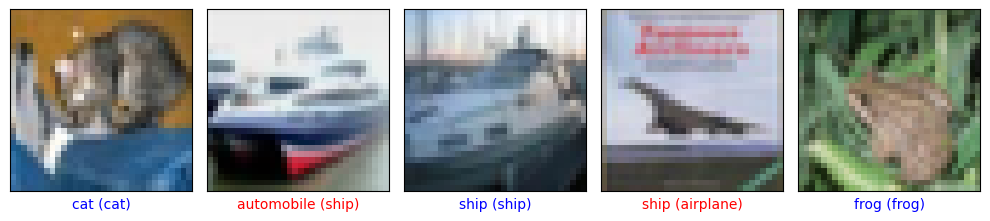

In [ ]:
'''Step 1 — Importing Necessary Libraries'''
import tensorflow as tf  # For building and training the CNN
from tensorflow.keras import layers, models  # For creating layers and models
import matplotlib.pyplot as plt  # for plotting images and accuracy graphs
import numpy as np  # For numerical operations

'''Step 2 Load and Preprocess the CIFAR-10 Dataset'''
# Load the CIFAR-10 dataset from TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values from range [0, 255] to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'''Step 3: Visualize Some Data'''
# Plot the first 5 images from the training set along with their labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False) # Disables Grid
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])  # Show the label with class name
plt.show()

'''Step4: Build the CNN model'''
model = models.Sequential([
# 1st Convolutional layer with 32 filter, a 3x3 kernal & ReLU activation
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    # Max Pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),

# 2nd Convolutional layer with 128 filters and ReLU activation
    layers.Conv2D(128, (5, 5), activation='relu'),
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),

# 3th Convolutional layer with 128 filters and ReLU activation
    layers.Conv2D(128, (5, 5), activation='relu'), # Changed kernel size to 2x2

    # Flatten the output to feed into FC layers
    layers.Flatten(),
    # FC layer with 32 neurons & ReLU activation
    layers.Dense(32, activation='relu'),
    # Output layer with 10 neurons(one for each class) & softmax activation
    layers.Dense(10, activation='softmax')
])

'''Step 5: Compile the Model'''
# Compile the model using Adam optimizer and sparse categorical crossentropy as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture summary
model.summary()

'''Step 6: Train the Model'''
# Train the model for 10 epochs and validate on the test data
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

'''Step 7: Evaluate the Model'''
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

'''Step 8: Plot Training and Validation Accuracy/Loss'''
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12,4))

# Plot training and validation accuracy
plt.subplot(1,2,1)  # 1 row, 2 columns, this is the first plot
plt.plot(history.history['accuracy'], label='Training Accuracy') # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plot validaton accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Add legend to differentiate the two lines

# Plot training and validation loss
plt.subplot(1,2,2)  # 1 row, 2 columns, this is the second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Add legend to differentiate the two lines

plt.show()

'''Step 9: Make Predictions on Test Data'''
# Make predictions on the first 5 test images
predictions = model.predict(test_images[:5])

'''Step 10: Visualize Predictions'''
# Define a function to display images and predictions
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)  # Disable grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.imshow(img) # display the image

    #Get the predicted label
    predicted_label = np.argmax(predictions_array)
    # Set the color of the text based on whether the pred is correct
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # show the pred and true label in the image
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

# Visualize the first 5 test images with predictions
plt.figure(figsize=(10,10))  # Create a figure for displaying 5 images in rows

for i in range(5): # loop through the first 5 images
    plt.subplot(1,5,i+1)  # 5 rows, 1 column, 1 image per row
    plot_image(i, predictions[i], test_labels, test_images, class_names)  # Call the plotting function
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Show the plot

**Trial2) When I added 4th convolutional layer the accuracy changed from 0.706 to 0.7002. which is a very small change**


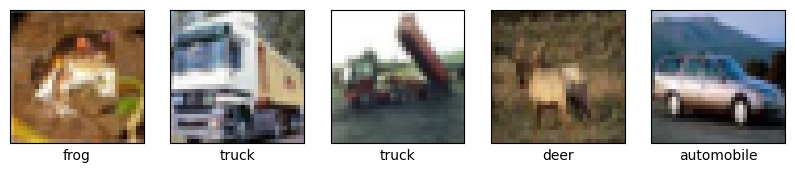

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,658 (639.29 KB)

 Trainable params: 163,658 (639.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3264 - loss: 1.8012 - val_accuracy: 0.5161 - val_loss: 1.3363
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5394 - loss: 1.2759 - val_accuracy: 0.5956 - val_loss: 1.1379
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6189 - loss: 1.0744 - val_accuracy: 0.6296 - val_loss: 1.0493
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6649 - loss: 0.9421 - val_accuracy: 0.6750 - val_loss: 0.9270
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6998 - loss: 0.8474 - val_accuracy: 0.6925 - val_loss: 0.8777
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7262 - loss: 0.7752 - val_accuracy: 0.7065 - val_loss: 0.8570
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7479 - loss: 0.7110 - val_accuracy: 0.7007 - val_loss: 0.8701
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7657 - loss: 0.6634 -

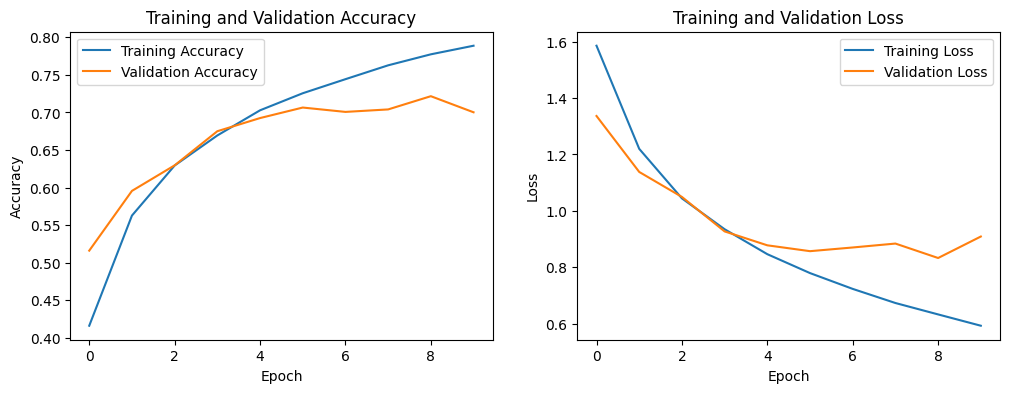

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


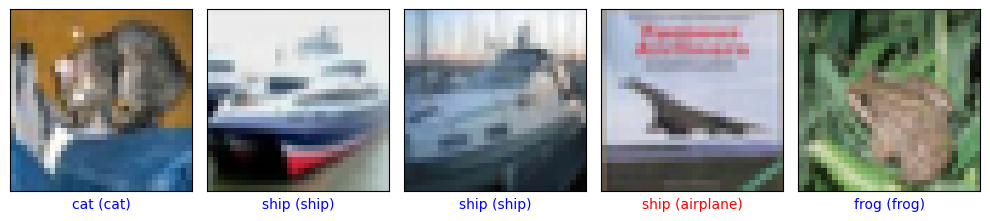

In [ ]:
'''Step 1 Importing Necessary Libraries'''
import tensorflow as tf  # For building and training the CNN
from tensorflow.keras import layers, models  # For creating layers and models
import matplotlib.pyplot as plt  # for plotting images and accuracy graphs
import numpy as np  # For numerical operations

'''Step 2 Load and Preprocess the CIFAR-10 Dataset'''
# Load the CIFAR-10 dataset from TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values from range [0, 255] to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'''Step 3 Visualize Some Data'''
# Plot the first 5 images from the training set along with their labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False) # Disables Grid
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])  # Show the label with class name
plt.show()

'''Step4 Build the CNN model'''
model = models.Sequential([
    # 1st Convolutional layer with 32 filter, a 3x3 kernal & ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max Pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    #2nd Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),

    #3rd Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
# 4th Convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Flatten the output to feed into FC layers
    layers.Flatten(),
    # FC layer with 64 neurons & ReLU activation
    layers.Dense(64, activation='relu'),
    # Output layer with 10 neurons(one for each class) & softmax activation
    layers.Dense(10, activation='softmax')
])

'''Step 5 Compile the Model'''
# Compile the model using Adam optimizer and sparse categorical crossentropy as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture summary
model.summary()

'''Step 6 Train the Model'''
# Train the model for 10 epochs and validate on the test data
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

'''Step 7 Evaluate the Model'''
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

'''Step 8 Plot Training and Validation Accuracy/Loss'''
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12,4))

# Plot training and validation accuracy
plt.subplot(1,2,1)  # 1 row, 2 columns, this is the first plot
plt.plot(history.history['accuracy'], label='Training Accuracy') # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plot validaton accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Add legend to differentiate the two lines

# Plot training and validation loss
plt.subplot(1,2,2)  # 1 row, 2 columns, this is the second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Add legend to differentiate the two lines

plt.show()

'''Step 9 Make Predictions on Test Data'''
# Make predictions on the first 5 test images
predictions = model.predict(test_images[:5])

'''Step 10 Visualize Predictions'''
# Define a function to display images and predictions
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)  # Disable grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.imshow(img) # display the image

    #Get the predicted label
    predicted_label = np.argmax(predictions_array)
    # Set the color of the text based on whether the pred is correct
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # show the pred and true label in the image
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

# Visualize the first 5 test images with predictions
plt.figure(figsize=(10,10))  # Create a figure for displaying 5 images in rows

for i in range(5): # loop through the first 5 images
    plt.subplot(1,5,i+1)  # 5 rows, 1 column, 1 image per row
    plot_image(i, predictions[i], test_labels, test_images, class_names)  # Call the plotting function
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Show the plot

***TASK2: Increase accuracy***


---





Trial3) When I changed the num of neurons in Fully connected layers the accuracy increased to 0.71

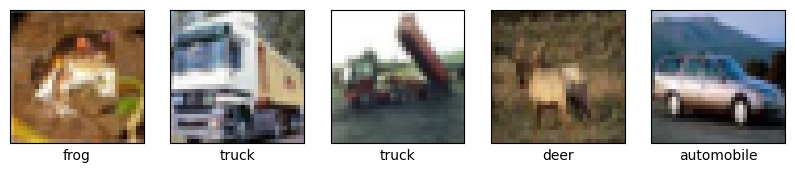

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3595 - loss: 1.7381 - val_accuracy: 0.5633 - val_loss: 1.2120
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5763 - loss: 1.1894 - val_accuracy: 0.5557 - val_loss: 1.2718
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6477 - loss: 1.0126 - val_accuracy: 0.6336 - val_loss: 1.0468
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6838 - loss: 0.9003 - val_accuracy: 0.6673 - val_loss: 0.9520
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7182 - loss: 0.8082 - val_accuracy: 0.6899 - val_loss: 0.8920
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7409 - loss: 0.7445 - val_accuracy: 0.6986 - val_loss: 0.8686
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7627 - loss: 0.6774 - val_accuracy: 0.7076 - val_loss: 0.8511
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7792 - loss: 0.6329 -

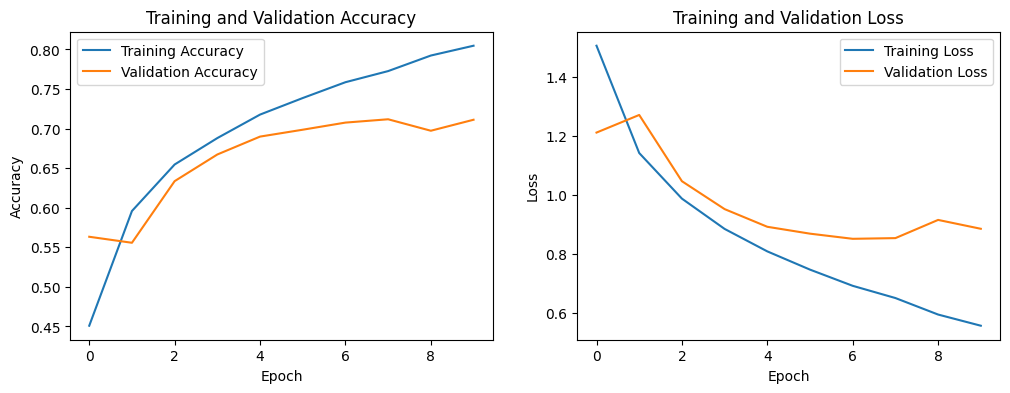

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


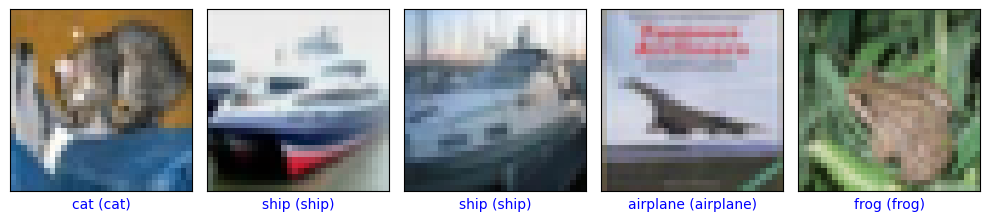

In [ ]:
'''Step 1 Importing Necessary Libraries'''
import tensorflow as tf  # For building and training the CNN
from tensorflow.keras import layers, models  # For creating layers and models
import matplotlib.pyplot as plt  # for plotting images and accuracy graphs
import numpy as np  # For numerical operations

'''Step 2 Load and Preprocess the CIFAR-10 Dataset'''
# Load the CIFAR-10 dataset from TensorFlow datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values from range [0, 255] to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'''Step 3 Visualize Some Data'''
# Plot the first 5 images from the training set along with their labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False) # Disables Grid
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])  # Show the label with class name
plt.show()

'''Step4 Build the CNN model'''
model = models.Sequential([
    # 1st Convolutional layer with 32 filter, a 3x3 kernal & ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max Pooling layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    #2nd Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),

    #3rd Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output to feed into FC layers
    layers.Flatten(),
    # FC layer with 128 neurons & ReLU activation
    layers.Dense(128, activation='relu'),
    # Output layer with 10 neurons(one for each class) & softmax activation
    layers.Dense(10, activation='softmax')
])

'''Step 5 Compile the Model'''
# Compile the model using Adam optimizer and sparse categorical crossentropy as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture summary
model.summary()

'''Step 6 Train the Model'''
# Train the model for 10 epochs and validate on the test data
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

'''Step 7 Evaluate the Model'''
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

'''Step 8 Plot Training and Validation Accuracy/Loss'''
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12,4))

# Plot training and validation accuracy
plt.subplot(1,2,1)  # 1 row, 2 columns, this is the first plot
plt.plot(history.history['accuracy'], label='Training Accuracy') # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plot validaton accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Add legend to differentiate the two lines

# Plot training and validation loss
plt.subplot(1,2,2)  # 1 row, 2 columns, this is the second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Add legend to differentiate the two lines

plt.show()

'''Step 9 Make Predictions on Test Data'''
# Make predictions on the first 5 test images
predictions = model.predict(test_images[:5])

'''Step 10 Visualize Predictions'''
# Define a function to display images and predictions
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)  # Disable grid
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.imshow(img) # display the image

    #Get the predicted label
    predicted_label = np.argmax(predictions_array)
    # Set the color of the text based on whether the pred is correct
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # show the pred and true label in the image
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

# Visualize the first 5 test images with predictions
plt.figure(figsize=(10,10))  # Create a figure for displaying 5 images in rows

for i in range(5): # loop through the first 5 images
    plt.subplot(1,5,i+1)  # 5 rows, 1 column, 1 image per row
    plot_image(i, predictions[i], test_labels, test_images, class_names)  # Call the plotting function
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Show the plot

***TASK3: Solving underfitting problem***

---



**After taking data augmentation lec I applied it & got this result with inceared accuracy because trying older things were not solving over/unde fitting prob**

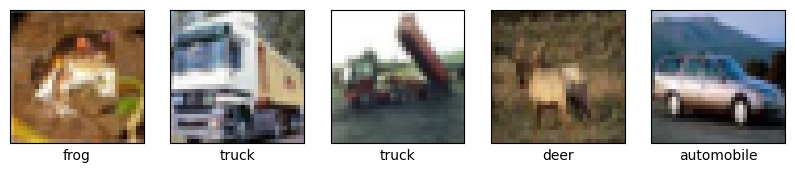

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2754 - loss: 2.0570 - val_accuracy: 0.4540 - val_loss: 1.4887 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4328 - loss: 1.5730 - val_accuracy: 0.4841 - val_loss: 1.4229 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4969 - loss: 1.4155 - val_accuracy: 0.5690 - val_loss: 1.1947 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5413 - loss: 1.3063 - val_accuracy: 0.5391 - val_loss: 1.3221 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5678 - loss: 1.2277 - val_accuracy: 0.6521 - val_loss: 0.9926 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5922 - loss: 1.1753 - val_accuracy: 0.6403 - val_loss: 1.0413 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6125 - l

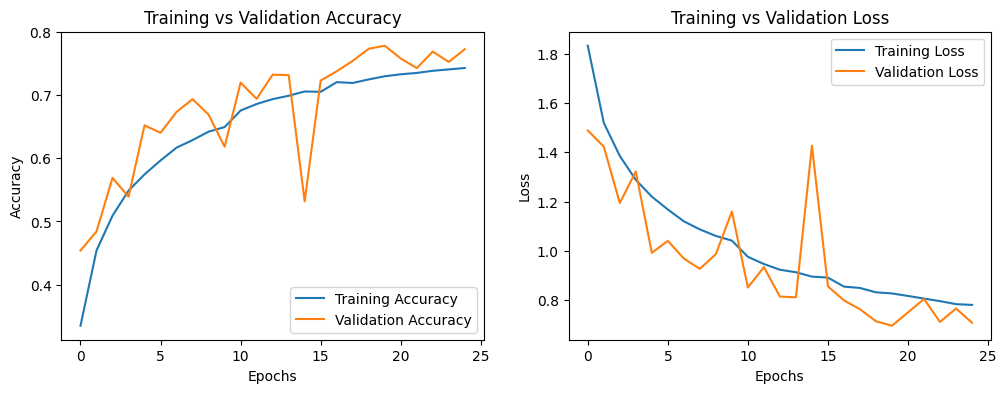

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


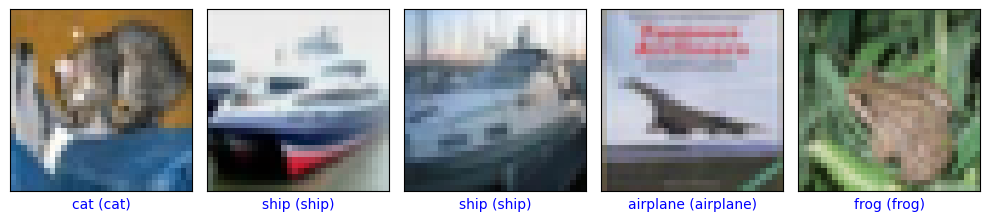

In [ ]:
'''Step 1: Import Libraries'''
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

'''Step 2: Load and Preprocess CIFAR-10'''
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

'''Step 3: Visualize Some Data'''
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

'''Step 4: Data Augmentation Layer'''
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

'''Step 5: Build the Improved CNN Model'''
l2_reg = 1e-5  # Lower L2 regularization

model = models.Sequential([
    data_augmentation,

    # 1st Conv Block
    layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(l2_reg),
                  input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # 2nd Conv Block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # 3rd Conv Block
    layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # 4th Conv Block (Extra for capacity)
    layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

'''Step 6: Compile the Model'''
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

'''Step 7: Define Callbacks'''
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

'''Step 8: Train the Model'''
history = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=64,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, lr_scheduler],
                    verbose=1)

'''Step 9: Evaluate the Model'''
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n✅ Test accuracy: {test_acc:.4f}")
print(f"✅ Test loss: {test_loss:.4f}")

'''Step 10: Plot Training and Validation Accuracy/Loss'''
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend()

plt.show()

'''Step 11: Make Predictions on Test Data'''
predictions = model.predict(test_images[:5])

'''Step 12: Visualize Predictions'''
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]), color=color)

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_image(i, predictions[i], test_labels, test_images, class_names)
plt.tight_layout()
plt.show()


When I increased FC layer and learning rate 0.001 the accuracy dropped
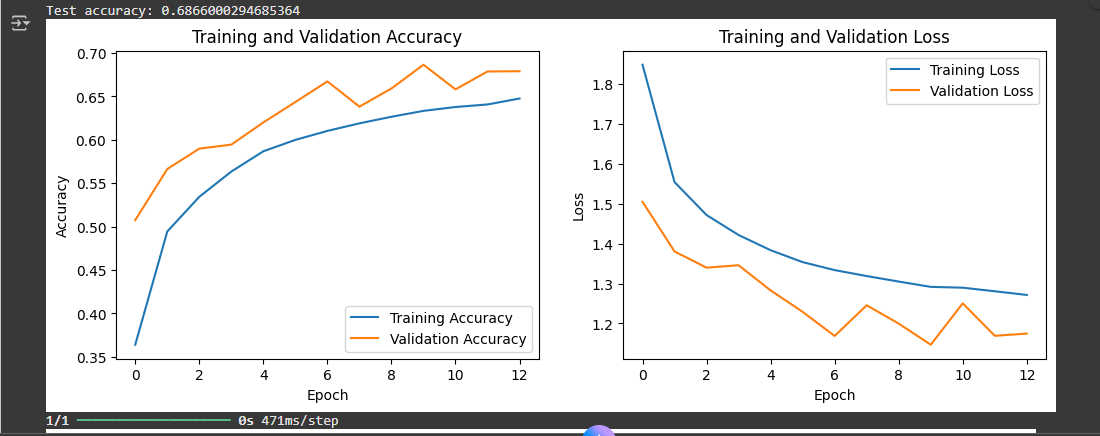

When I choose learning rate = 0.0001 the result was underfitting
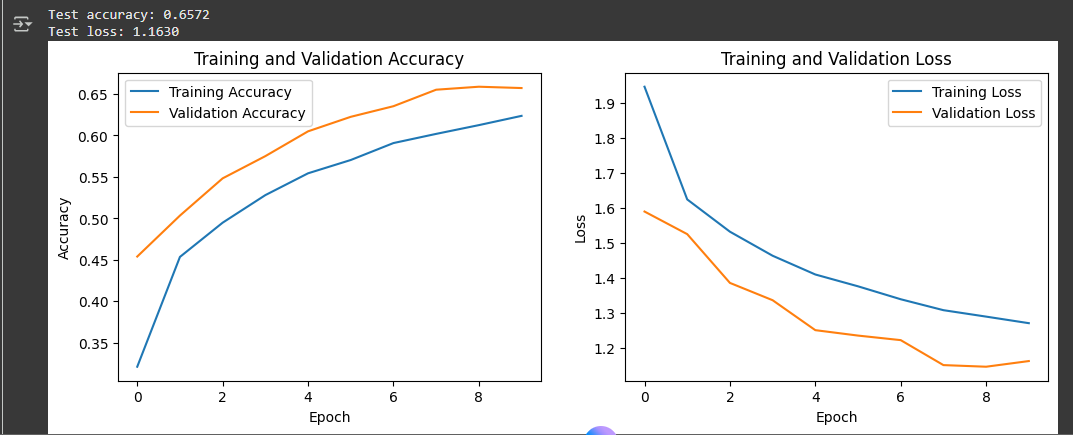

When I choose learning rate=0.001 the graph was underfitting
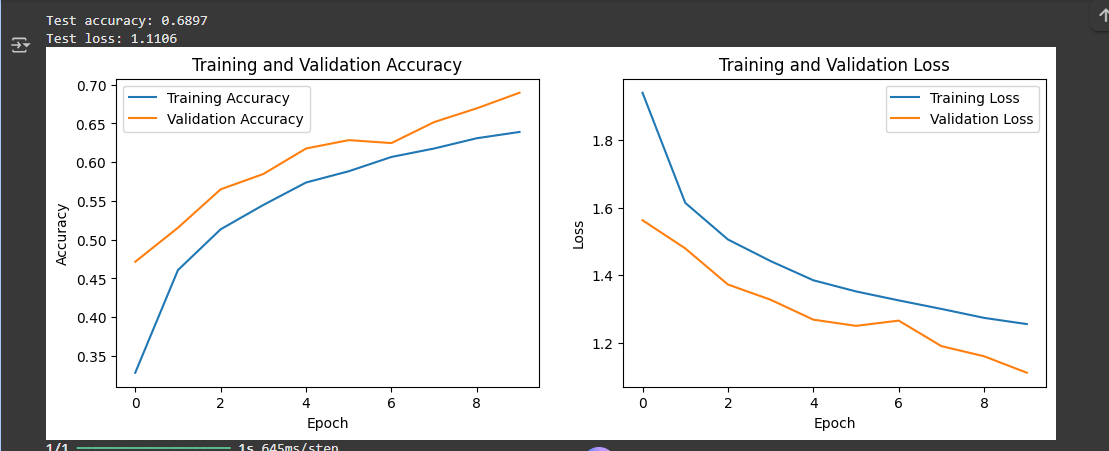